In [1]:
'''
 문) 중학교 1학년 신체검사(bodycheck.csv) 데이터 셋을 이용하여 다음과 같이 군집모델을 생성하시오.
  <조건1> 악력, 신장, 체중, 안경유무 칼럼 대상 [번호 칼럼 제외]
  <조건2> 계층적 군집분석의 완전연결방식 적용 
  <조건3> 덴드로그램 시각화 
  <조건4> 텐드로그램을 보고 3개 군집으로 서브셋 생성  
'''

import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram # 계층적 군집 model
import matplotlib.pyplot as plt

# data loading - 중학교 1학년 신체검사 결과 데이터 셋 
body = pd.read_csv("C:/Users/hyebin/Desktop/Python_ML/chap09_Cluster/data/bodycheck.csv", encoding='ms949')
body.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   번호      15 non-null     int64
 1   악력      15 non-null     int64
 2   신장      15 non-null     int64
 3   체중      15 non-null     int64
 4   안경유무    15 non-null     int64
dtypes: int64(5)
memory usage: 728.0 bytes


In [2]:
# <조건1> subset 생성 - 악력, 신장, 체중, 안경유무 칼럼  이용 
cols = list(body.columns)
bodyDF = body[cols[1:]]
print(bodyDF)

    악력   신장  체중  안경유무
0   28  146  34     1
1   46  169  57     2
2   39  160  48     2
3   25  156  38     1
4   34  161  47     1
5   29  168  50     1
6   38  154  54     2
7   23  153  40     1
8   42  160  62     2
9   27  152  39     1
10  35  155  46     1
11  39  154  54     2
12  38  157  57     2
13  32  162  53     2
14  25  142  32     1


In [3]:
# <조건2> 계층적 군집 분석  완전연결방식 - 가장 먼 거리의 클러스터를 대상으로 거리 측정하는 방식  
clusters = linkage(bodyDF, method='complete')

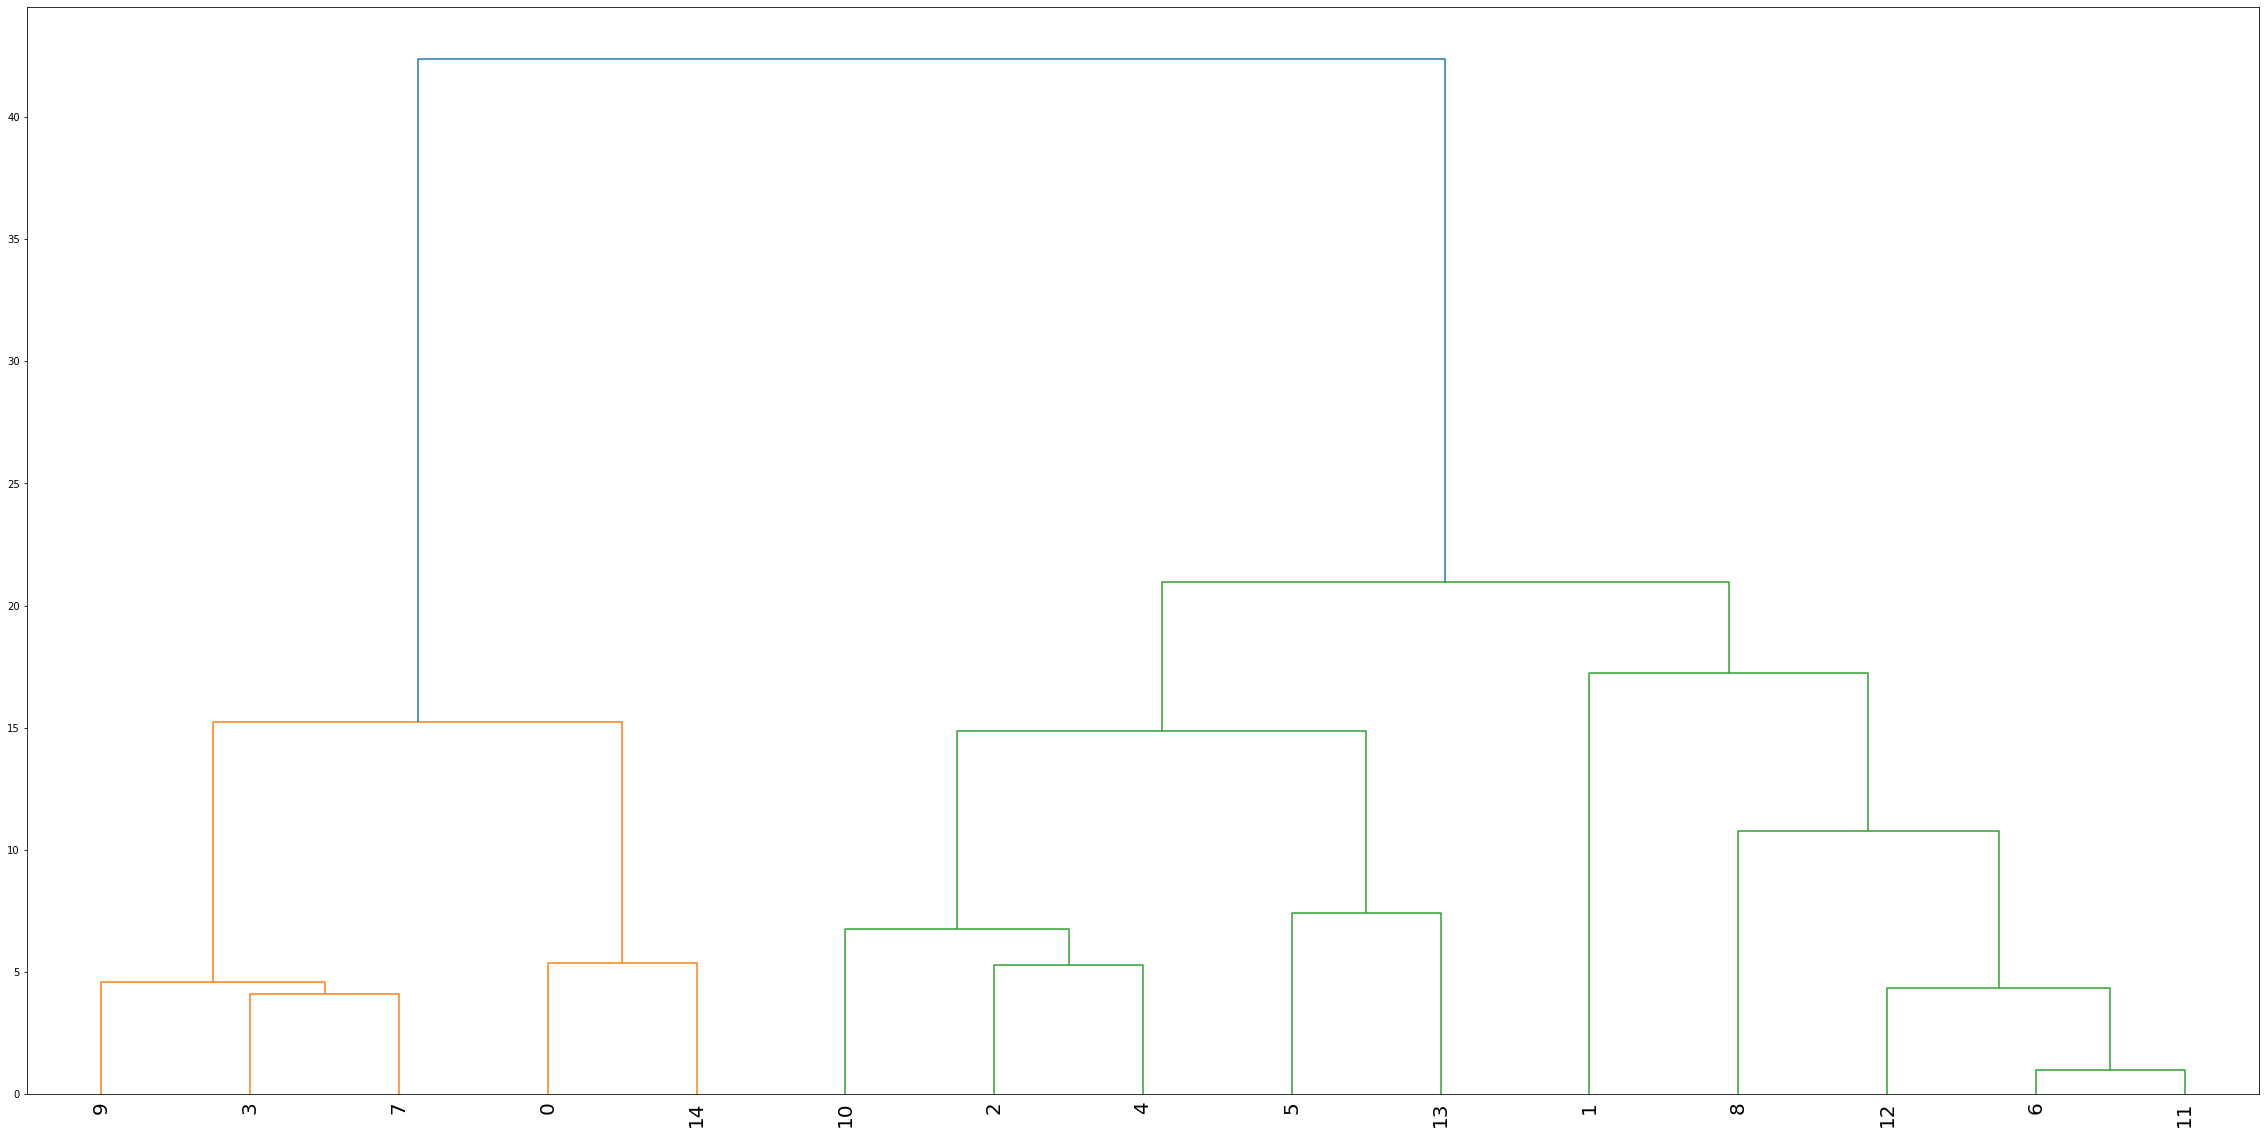

In [4]:
# <조건3> 덴드로그램 시각화 : 군집수는 사용 결정 
plt.figure(figsize=(40, 20))
dendrogram(clusters, 
           #labels = labels.as_matrix(columns=['labels']),
           leaf_rotation=90,
           leaf_font_size=20,)
plt.show()

In [9]:
# <조건4> 텐드로그램을 보고 3개 군집으로 서브셋 생성
'''
cluster1 - 9 3 7 0 14
cluster1 - 10 2 4 5 13
cluster1 - 1 8 12 6 11
'''

# 각 집단별 subset 생성 
cluster1 = bodyDF.loc[[9,3,7,0,14],:]
cluster2 = bodyDF.loc[[10,2,4,5,13],:]
cluster3 = bodyDF.loc[[1,8,12,6,11],:]


# 각 집단별 특징 분석 
cluster1.describe() # 신체 소, 안경=1


,악력,신장,체중,안경유무
count,5.000000,5.000000,5.000000,5.0
mean,25.600000,149.800000,36.600000,1.0
std,1.949359,5.674504,3.435113,0.0
min,23.000000,142.000000,32.000000,1.0
25%,25.000000,146.000000,34.000000,1.0
50%,25.000000,152.000000,38.000000,1.0
75%,27.000000,153.000000,39.000000,1.0
max,28.000000,156.000000,40.000000,1.0


In [10]:
cluster2.describe()# 신체 중, 안경=1 or 2

,악력,신장,체중,안경유무
count,5.000000,5.000000,5.000000,5.000000
mean,33.800000,161.200000,48.800000,1.400000
std,3.701351,4.658326,2.774887,0.547723
min,29.000000,155.000000,46.000000,1.000000
25%,32.000000,160.000000,47.000000,1.000000
50%,34.000000,161.000000,48.000000,1.000000
75%,35.000000,162.000000,50.000000,2.000000
max,39.000000,168.000000,53.000000,2.000000


In [11]:
cluster3.describe() # 신체 대, 안경=2

,악력,신장,체중,안경유무
count,5.000000,5.000000,5.000000,5.0
mean,40.600000,158.800000,56.800000,2.0
std,3.435113,6.220932,3.271085,0.0
min,38.000000,154.000000,54.000000,2.0
25%,38.000000,154.000000,54.000000,2.0
50%,39.000000,157.000000,57.000000,2.0
75%,42.000000,160.000000,57.000000,2.0
max,46.000000,169.000000,62.000000,2.0
